# CMPE482 - Spring 2021 - Assignment 3
**Student ID**: 2017402069 \
**Name**: Nilüfer Çetin \
**Date**: 29.04.2021

The following four questions are part of the Assignment 3 of CMPE482 course. It should be noted that these problems might have various solutions and the guidelines provided by the student might not be the most effective or quickest solutions to exist. 

Firstly, packages that can be used are imported,

In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sns

# Please Note that

For sake of aesthetic, the downloaded house sales dataset of **Question 1** is placed on the appendices at the end of this study. It is kindly recommended to the reader to first run the code on appendices at the end of the study before delving deeper.

# Question 1

Download the Sacramento house sales data provided in the [Python companion of the IALA](https://ses.library.usyd.edu.au/bitstream/handle/2123/21370/vmls-python-companion.pdf?sequence=3&isAllowed=y). As in the book, we will use this data set to attempt to predict house prices based on the features we are provided. Conduct the feature engineering steps described in the book [VMLS](http://vmls-book.stanford.edu/vmls.pdf) Chapter 13.1.2. As in the book, you should end up with a total of 8 basis functions. Take the *first* 600 observations as your training set, and the *last* 174 observations as the test set.

In [4]:
#Code from the Python Companion IALA
D = house_sales_data()     #PLEASE FIRST RUN THE CODE ON APPENDICES AT THE END
price = D['price']         #columns are turned into single vectors for ease of use
area = D['area']
beds = D['beds']
condo = D['condo']
location = D['location']
N = len(price)              #size of the observations are obtained to add bias terms

#features are bias term, area, area if area is greater than 1.5, #beds, condo, and binary variables indicating the location of house
X = np.column_stack([np.ones(N), area, np.maximum(area-1.5,0),
beds, condo, location==2, location==3, location==4])

#the data is partitioned into train and test sets
train = X[0:600,:]
test = X[600:,:]

## Q1-Part a
Use your training set to find and print the least squares estimate ${\hat{\theta}}$.

The training set consists of *600* observations of **8 features**. The importance or effect of these features in determining the household price is unknown to the reader and from the observations and output, estimates for these effects can be found in a way to **minimize** the square of the errors. In other words, ${\hat{\theta}}$ is an estimator of an actual ${\theta}$ that is unknown which is consisting of coefficients to the features. 

In this and most of the data fitting examples, the number of observations are greater than the number of features. To put it differently, there are more equations than number of features of which the coefficients to be determined. With matrix notation,

${A\hat{\theta} = b}$, where ${A}$ is the matrix carrying a single observation of each features in each row and ${b}$ is the observed output

Ideally the solution to this system, ${\hat{\theta}}$ can be found by,

${A^{-1}A\hat{\theta} = A^{-1}b}$

${I\hat{\theta} = A^{-1}b}$

${\hat{\theta} = A^{-1}b}$

However, this is an **over-determined system** and it is obvious that there is no ${A^{-1}}$. Hence, ${b}$ can only be approximated with a certain ${\hat{\theta}}$ by minimizing the squared errors.

${A\hat{\theta} \approx b}$

The best candidate to use instead of the non-existent ${A^{-1}}$ is the **psuedo-inverse** in this case the ***left-inverse*** of ${A}$. Consequently,

${\hat{\theta} = A^{-L}b}$ , where ${A^{-L}}$ is the left inverse of ${A}$.

Because of the strategy of minimizing the squared errors, the process is called **least squares data fitting** and ${\hat{\theta}}$ is said to be the **least square estimator** of the actual ${\theta}$.

In [5]:
theta_hat = sp.linalg.pinv(train)@price[0:600]
theta_hat

array([ 112.84042349,  161.51940759,  -31.9684853 ,  -13.26024458,
        -13.9593206 ,  -97.24789109, -102.62186246,  -14.47469666])

## Q1-Part b
Using ${\hat{\theta}}$, find and print the **RMS** on the training set and the test set.

Ideally, for each observation, whether in train or test set, the linear combination of features multiplied with the respective coefficients in ${\hat{\theta}}$ is an ***estimator*** of the output value.

Once a ${\hat{\theta}}$ is found, **RMS** of *error vectors* on training and test set are valuable metrics that may yield some information about the performance of the estimator, in other words how successful the selection of features has been compared to other feature sample selections. **RMS** is defined as,

${x_{RMS} = \sqrt{\frac{1} {n} ({x_1}^2 + {x_2}^2 + ... + {x_n}^2})}$, where ${x}$ is a vector of length ${n}$ with entries ${x_1, x_2, ..., x_n}$

In [7]:
train_error = train @ theta_hat - price[0:600]
test_error = test @ theta_hat - price[600:]
train_rms = math.sqrt((train_error).T @ train_error / len(train_error))
test_rms = math.sqrt((test_error).T @ test_error / len(test_error))

print("Train RMS: " +str(train_rms) +" Test RMS: " +str(test_rms))

Train RMS: 67.88838459483728 Test RMS: 70.3641996199021


## Q1-Part c
Examine the usefulness of the basis function ${f_3}$ suggested by the authors in terms of generalization. Create a second version of your data, this time dropping the column that correspond to the basis function ${f_3}$ described in your book. Find a new ${{\hat{\theta}}^{'}}$ using least squares method with this version of the data. Again compute the training set RMS and test set RMS of your predictions, and compare these with the results of your previous model that produced ${\hat{\theta}}$. Based on your analysis, is the inclusion of basis function ${f_3}$ useful? What did you base your decision on?

To exclude the feature ${f_3}$, dropping this column of observations and repeating the same process with **Part a** is enough. Ofcourse, this means that there will now be *seven* features of which the coefficients must be decided on via least squares. When procedure is followed, a new ${{\hat{\theta}}^{'}}$ is found as,

In [8]:
#dropping the observations of f3 from both train and test data
train_c = np.delete(train, 2, axis=1)
test_c = np.delete(test, 2, axis=1)

theta_hat_c = sp.linalg.pinv(train_c)@price[0:600]
theta_hat_c

array([ 139.24187905,  135.11686268,  -10.89543447,  -18.49737516,
        -98.18633863, -103.63029527,  -13.50072281])

As can be seen the values in the new ${{\hat{\theta}}^{'}}$ is **different** compared tot the original ${\hat{\theta}}$. Without the feature ${f_3}$, other features are definetely playing bigger roles on the explanation of variability in the training set. In other words, the effects of the remaining features in estimating, or rather fitting, the prices have changed. It should be noted that there is no real change in the relationship between the features and the output variable, this is a change in what has been perceived as the relationship.

If the estimations are found by,

${A \hat{\theta} = \hat{b}}$

And if the error vectors are found by,

${e = b - \hat{b}}$

In [9]:
#since the norm of the error vector is needed it can be calculated in reverse way too
train_error_c = train_c @ theta_hat_c - price[0:600]
test_error_c = test_c @ theta_hat_c - price[600:]

#RMS values are calculated
train_rms_c = math.sqrt((train_error_c).T @ train_error_c / len(train_error_c))
test_rms_c = math.sqrt((test_error_c).T @ test_error_c / len(test_error_c))

print("Train RMS: " +str(train_rms_c) +" Test RMS: " +str(test_rms_c))

Train RMS: 68.05912603229082 Test RMS: 71.00134435600772


When these **RMS** values are inspected, it can be seen that the change in **RMS** for both train and test sets are approximately *1*. Without knowing the internal structure of the problem or at least the level of output variable or previous **RMS** values, this nominal quantity does not tell much about the importance of ${f_3}$. 

Nevertheless, if the problem is thought backwards it can be said that there is a decrease of approximately *1* in the **RMS** values that level around *70*. This makes roughly ${\frac{1} {70} = 1.42\%}$ decrease in the variability of the guesses from their actual values. As this is a very small quantity, the inclusion of ${f_3}$ as a feature is not very useful on fitting the data. Moreover, as this is *kind of* an indicator of whether the area of the house is greater than 1.5 and area is **already** a feature, this finding makes sense. 

# Question 2

Continue using your data from Q1 (the version that includes ${f_3}$). We will now convert this problem to a ***multi-objective least-squares problem*** by including a regularization term, as described in Section 15.3.1 in the book [VMLS](http://vmls-book.stanford.edu/vmls.pdf) under the title **Tikhonov regularized inversion**.

With **Tikhonov regularized inversion** the goal is to ***minimize***,

${||A\hat{\theta} - b||^2 + \lambda||\hat{\theta}||^2}$ for the training set of observations ${A}$

This is based on some prior assumption of ${\hat \theta}$ to be small rather than large.

The first term in the above equation is suitable for the method of *least-squares*, by a small adjustment the second term in the equation can also be turned into a suitable form,

${||A\hat{\theta} - b||^2 + ||\sqrt{\lambda}*I\hat{\theta} - 0||^2}$

Hence, a new matrix ${\tilde A}$ and a new vector ${\tilde b}$ can be constructed for this ***multiobjective least-squares problem*** by,

${\tilde A = \begin{bmatrix} A \\ \sqrt {\lambda}I \end{bmatrix}}$

${\tilde b = \begin{bmatrix} b \\ (0)_n \end{bmatrix}}$ , where ${n}$ is the number of features

The columns of ${\tilde A}$ is **always** linearly independent and its Gram Matrix is **always** invertible for ${\lambda > 0}$ as proven in the book [VMLS](http://vmls-book.stanford.edu/vmls.pdf) under the mentioned section. With this property a **Tikhonov regularized approximate solution** can be formulized as,

${\hat \theta = (A^TA + \lambda I)^{-1}A^Tb}$

## Q2-Part a
Find and print ${\hat{\theta}_1}$ and ${\hat{\theta}_2}$ using regularized least squares, by setting ${\lambda}$ equal to ${.00001}$ and ${100000}$, respectively. Compare ${\hat{\theta}_1}$ and ${\hat{\theta}_2}$ to the original ${\hat{\theta}}$ you found in Q1. Which one is closer to ${\hat{\theta}}$? What does the other one look like? Why?

In [10]:
#although there is a formula, solving the system of Atilde -> btilde will also give the same result
train_2 = np.vstack((train, math.sqrt(0.00001)*np.identity(8))) #creating Atilde
train_output_2 = np.concatenate((price[0:600], np.zeros((8))))  #creating btilde
theta_hat_1 = sp.linalg.pinv(train_2)@train_output_2            #finding theta
print("Theta vector with lambda = 0.00001:" ,str(theta_hat_1))

Theta vector with lambda = 0.00001: [ 112.84025841  161.51935426  -31.96843722  -13.2602259   -13.95931409
  -97.24771278 -102.62168378  -14.47451183]


In [11]:
train_2 = np.vstack((train, math.sqrt(100000)*np.identity(8)))  #creating Atilde
train_output_2 = np.concatenate((price[0:600], np.zeros((8))))  #creating btilde
theta_hat_2 = sp.linalg.pinv(train_2)@train_output_2            #finding theta
print("Theta vector with lambda = 100000:" ,str(theta_hat_2))

Theta vector with lambda = 100000: [1.23456241 2.25297387 0.55813216 4.22341999 0.04239402 0.51788587
 0.53015913 0.13459842]


The two vectors of ${\hat{\theta}_1}$ and ${\hat{\theta}_2}$ are very different compared to one another. This is a good illusturation on the effect of **regularization parameter**. The first experiment of ${\hat{\theta}_1}$ with ${\lambda = 0.0001}$ is a lot more closer to the original ${\hat \theta}$ found in **Q1-Part a**. 

Regularization is in itself another kind of problem where the **regularization parameter ${\lambda}$** acts as a tuning parameter between the trade-off of smaller training set error versus smaller coefficients of features. As ${\lambda}$ becomes bigger the dominant objective of the **multi objective least-squares problem** becomes finding a smaller set of coefficient values sacrificing the data-fitting. 

This is why ${\hat{\theta}_1}$ with ${\lambda = 0.0001}$ is a lot more closer to the original ${\hat \theta}$ found in **Q1-Part a** with no regularization (${\lambda = 0}$). The objectives in these two problems are actually quite similar to one another compared to the similarity between ${\lambda = 0}$ and ${\lambda = 100000}$. On the other hand, ${\lambda = 100000}$ means that the primary aim of the least-squares is obviously to find a small set of coefficient values so that when the norm of coefficient vector ${||\hat{\theta}_2 - 0||^2}$ is multiplied to *100000*, the error is still small. This explains why the coefficients of ${\hat{\theta}_2}$ is very small compared to the other vectors of ${\hat{\theta}}$

## Q2-Part b
Find the value of ${\lambda}$ that is best for generalization among the candidates${\{0, .001, .01, .1, 1.\}}$. Print the training RMS and test RMS for all values of ${\lambda}$, and clearly state your chosen ${\lambda}$ as the best one.

In [12]:
#the process is the same that is commented at Q2-Part a
for i in np.array([0, 0.001, 0.01, 0.1, 1]):
    print("Trying the lambda: ", str(i))
    train_new = np.vstack((train, math.sqrt(i)*np.identity(8)))
    train_output_new = np.concatenate((price[0:600], np.zeros((8))))
    theta_hat_new = sp.linalg.pinv(train_new)@train_output_new
    print("Theta: ", str(theta_hat_new))
    train_error_new = train @ theta_hat_new - price[0:600]
    test_error_new = test @ theta_hat_new - price[600:]
    train_rms_new = math.sqrt((train_error_new).T @ train_error_new / len(train_error_new))
    test_rms_new = math.sqrt((test_error_new).T @ test_error_new / len(test_error_new))
    print("Train: ", str(train_rms_new), " Test: ", str(test_rms_new))
    print("\n")
    

Trying the lambda:  0.0
Theta:  [ 112.84042349  161.51940759  -31.9684853   -13.26024458  -13.9593206
  -97.24789109 -102.62186246  -14.47469666]
Train:  67.88838459483728  Test:  70.36419961990208


Trying the lambda:  0.001
Theta:  [ 112.82392005  161.51407427  -31.96367671  -13.25837697  -13.95866994
  -97.23006424 -102.60399815  -14.45621785]
Train:  67.88838467762417  Test:  70.36467635960422


Trying the lambda:  0.01
Theta:  [ 112.67578714  161.4660525   -31.92036734  -13.2415752   -13.95282095
  -97.06997883 -102.44357524  -14.29029616]
Train:  67.88839284475874  Test:  70.36897147638618


Trying the lambda:  0.1
Theta:  [ 111.23278576  160.98389991  -31.48437462  -13.07422716  -13.8949696
  -95.50356973 -100.87376373  -12.66858084]
Train:  67.88918173853497  Test:  70.4123321648489


Trying the lambda:  1.0
Theta:  [ 99.79159031 156.12975207 -27.02992953 -11.46840612 -13.34925621
 -82.62880581 -87.96311048   0.50170627]
Train:  67.94722661260714  Test:  70.86432842702067




When the training and test **RMS** values are checked, it can be commented that there is not much change in the values going from *0* to *1*. When values are inspected more deeply, it can be seen that change is very small (in ${0.001}$ to ${0.01}$) in the **RMS** of error vector on the training data and the values are continuously getting ***bigger***. This is actually an expected result since greater ${\lambda}$ means prioritizing the goal of fitting a smaller set of coefficients more compared to fitting the observations. Consequently, the error of training set data is sacrificed to grow bigger. 

Nevertheless, the metrics evaluating the training set can be misleading as it can involve **over-fitting**, a phonemena in which actually inconsistent patterns of behavior in some parts of the training set are captured by the features in the quest of fitting the data. This seemingly explainable patterns are usually noise (random deviations) and in the testing stage the relationships ensured by these random patterns do not add up to the coverage in the variability of observations. This is why conducting an analysis with giving more weight to results of test stage is always preferred. Over-fitting is also another reason why *regularization* is used. With bigger weights given to coefficients, it is more possible to make these features cover inconsistent patterns. To ensure the features behave properly and eliminate the probability of **over-fitting**, the levels of coefficients are being kept small in many problems of different domains. Due to this phonemena, it is expected for the testing performance to increase for some time as more weight is given to minimize the norm of the coefficient vector, decreasing over-fitting and making room for more accurrate guesses by only incorporating actual and real patterns which are observed more dominantly. There is actually a sort of ***sweet spot*** in many problems, in which the testing **RMS** converge to a minimum showing somewhat the ideal amount of regularization that can be maintained through the problem.  

However, in this specific problem both training and test data tell the same story. In experiments with both sets, the values of **RMS** are continuously growing, though very small (in ${0.001}$ to ${0.01}$). This means that the original problem does not include **over-fitted patterns** of random noises. For this problem with these set of features, over-fitting does not seem to be a problem so no regularization can be chosen with ${\lambda = 0}$.

# Question 3

Continue using your data from Q1 (the version that includes ${f_3}$). We will now add polynomial and interaction terms to our basis functions as further feature engineering.

## Q3-Part a
Temporarily ignoring the training/test set distinction, create polynomial and interaction terms of the original basis functions by using their multiplications with each other as new bases. You should end up with *774* observations with *36* basis functions such that (ignoring ${x}$’s for brevity): ${f_1, f_2, ..., {f_1}^2, {f_2}^2, ..., f_1f_2, f_1f_3, ..., f_7f_8}$. (Note: There are practical reasons specific to this data set that makes this a bad idea, but we will ignore them for the sake of the example.). 

In [13]:
X_feature = X                                            #a new matrix of features is created to not lose the original
for i in range(0, 8):
    for j in range(i, 8):
        feature = np.expand_dims(X[:,i]*X[:,j], axis=1)  #the new feature vector is created by multiplying previous columns element-wise
        X_feature = np.hstack((X_feature, feature))      #new features are continuously added to the existing observations of features

X_feature = X_feature[:,8:]                              #selecting only interaction terms

## Q3-Part b
Using the training/test set distinction in Q1 (first 600 - last 174), and with ${\lambda = .1}$, decide whether this new set of features are an improvement on the original set in terms of generalization.

In [14]:
#training and test sets are partitioned
train_feature = X_feature[0:600, :]
test_feature = X_feature[600:, :]

#regularization terms are found
train_feature2 = np.vstack((train_feature, math.sqrt(0.1)*np.identity(36)))
train_feature_output = np.concatenate((price[0:600], np.zeros((36))))

#new coefficient vector is found as
theta_feature = sp.linalg.pinv(train_feature2)@train_feature_output
theta_feature

array([-3.28239253e+01,  4.91786382e+01, -5.52410755e+01,  8.41621301e+01,
        2.76448609e+01, -1.10787486e+01,  1.77981498e+01, -3.00350971e+00,
        1.70163057e+02, -1.33841054e+02, -7.62370746e+01,  3.40075787e+01,
       -7.41166015e+01, -1.39429544e+02, -1.21745123e+02, -5.09794405e+01,
        8.92318102e+01,  4.15056102e+01, -1.22475663e+02, -5.87815798e+01,
       -4.47637253e+01, -3.10057344e+00, -5.47467731e+01,  1.86463038e+01,
        2.64186163e+01,  5.67343142e+01,  2.76448609e+01,  3.10803256e+01,
       -1.62436175e+00, -1.81110294e+00, -1.10787486e+01, -2.34414921e-13,
       -1.29309535e-27,  1.77981498e+01,  7.29423653e-16, -3.00350971e+00])

Though some feature coefficients are very small, most of them are close to each other. To decide whether these features have been helpful in fitting the data and estimating from new data, **RMS** values of training and test sets compared to previous experiments can be used as metrics. 

In [15]:
#founding fitted values and calculating error vectors
train_feature_error = train_feature @ theta_feature - price[0:600]
test_feature_error = test_feature @ theta_feature - price[600:]

#calculating RMS
train_rms_f = math.sqrt((train_feature_error).T @ train_feature_error / len(train_feature_error))
test_rms_f = math.sqrt((test_feature_error).T @ test_feature_error / len(test_feature_error))
print("Train RMS: ", str(train_rms_f), " Test RMS: ", str(test_rms_f))

Train RMS:  65.36122919067303  Test RMS:  72.11386181133226


This **RMS** value of training stage have decreased slightly whereas the **RMS** value of testing stage have increased a little. 
This is a common behavior as more and more features are added to the model to explain the variability. As mentioned in **Q2-Part b**, increase in number of features will lead the problem to become able to capture more variability some consistent and some in the form of random patterns, deviations and noise. Hence, it is no surprise that the **RMS** value of training data decreased, hinting a better performance in this period.

Turning to the testing, the **RMS** value is bigger compared to *70.36* found in **Q1-Part b** and *70.42* found in **Q2-Part b** with same ${\lambda}$. This shows that at least some of the features added by polynomial interaction terms are capturing some random patterns that seem like relationships, which in reality do not exist. More delicately, adding these new features have resulted in ***over-fitting***, decreasing the model performance. In short, the new features are **not** improvement on the original set in terms of generalization.

## Q3-Part c
Imagine we only had access to *30* observations as our training set, and we still wanted to use our **36 basis features**. Examine the equation at the end of [VMLS Section 15.3.1](http://vmls-book.stanford.edu/vmls.pdf). Can we still find a solution with ${\lambda > 0}$ using this equation? Can we find a solution with ${\lambda = 0}$ using this equation? If we cannot, what alternative do we have for ${\lambda = 0}$ (you may assume that the basis columns are independent for this last question)?

The equation given by the book at the end of the section is,

${\hat x = (A^TA + \lambda I)^{-1}A^Tb}$, which was provided before with replacing ${\hat x}$ as ${\hat \theta}$

This equation is provided to always exist for ${\lambda > 0}$ not depending on the dimensions of the original ${A}$. This is because once ${\sqrt{\lambda}*I}$ is stacked on to the original ${A}$, the resulting ${\tilde A}$ always has **linearly independent columns**, which can be easily shown as,

${\tilde A}$ has linearly independent columns if ${\tilde{A}x = 0}$ only for the vector ${x = 0}$ since matrix vector multiplication results in a linear combination of the columns of the matrix and for a matrix with linearly independent columns the only way this can be ensured is if the vector is a vector of zeros.

This also means that the *Gram-Matrix* of ${\tilde A}$ which is ${\tilde {A^T}\tilde A}$ is always invertible that can also be decomposed as,

${\tilde {A^T}\tilde A = A^TA + \lambda I}$

Hence, there is always a left inverse which combined with ${b}$ gives an estimate of ${\hat x}$,

${\hat x = (A^TA + \lambda I)^{-1}A^Tb}$

Proven, for ${\lambda > 0}$ there **always** exists a regularized approximate solution.

For ${\lambda = 0}$, when only *30* observations are gathered from the data with a number of features greater than the number of observations, the matrix of observations denoted by ${A}$ has dimensions ${30 x 36}$ and is a **wide** matrix, which definitely does have some linearly dependent columns. This means that the *Gram-Matrix* is **not invertible**, meaning that the found formula cannot be calculated. In this case,

${\hat x = (A^TA)^{-1}A^Tb}$, where ${(A^TA)^{-1}A^T}$ is the **left inverse** of ${A}$

In the cases where left inverse does not exist, it has been proven in [Assignment2](https://nilufercetin.github.io/CMPE482-Applications-of-Linear-Algebra/files/2017402069_cetin_cmpe482_assignment_2.html) that ***right inverse*** is a good approximation. So instead of the left inverse, when right inverse is plugged into the formula,

${\hat x = A^T(AA^T)^{-1}b}$ multiplying both sides with the matrix ${A}$,

${A\hat x = (AA^T)(AA^T)^{-1}b = Ib}$

${A\hat x = b}$ proven.

Also in this case, ${A}$ is a matrix with **linearly independent rows**, which means that the system is under-determined. Hence there are a set of possible solutions that preserve the equality in this case with **right inverse** being the specific one.

# Question 4

For this question, you are expected to fit a piecewise polynomial ${y \approx \hat f(x)}$ to a set of points ${{\{(x_i,y_i)\}}^{N}_{i=1}}$. Let ${p_1(x), p_2(x),}$ and ${p_3(x)}$ be polynomials of degree ${D = 4}$, and let ${\hat f(x)}$ be defined as follows:

${\hat f(x) =  p_1(x) = \sum \limits_{j=0} ^ D c_jx^j, \hspace{10mm} -1.5 \leq x < -0.5}$

${\hat f(x) =  p_2(x) = \sum \limits_{j=0} ^ D c_{D+1+j}x^j, \hspace{10mm} -0.5 \leq x < 0.5}$
 
${\hat f(x) =  p_3(x) = \sum \limits_{j=0} ^ D c_{2D+2+j}x^j, \hspace{10mm} 0.5 \leq x < 1.5}$

Our goal for this question will be to find the coefficient vector ${c}$ which minimizes the squared error ${E = \sum \limits_{i=1} ^{N} (y_i - \hat f(x_i))^2}$. While doing so, we require ${\hat f(x)}$ to be ***continuous***, and also to have ***continuous first and second derivatives***.

## Q4-Part a
For ${N = 150}$, sample ${x_1, x_2, ..., x_N}$ from the uniform distribution ${U[-1.5, 1.5]}$, and sort them so that ${x_1 \leq x_2 \leq ... \leq x_N}$. For each ${x_i}$, compute ${y_i = x_i(e^{-{x_i}^2} + cos6x_i) + \epsilon_i}$ where ${\epsilon_i \sim N(0, \sigma^2)}$ with ${\sigma = 0.1}$. Create a scatter plot of x = ${[x_1, ..., x_N]}$ vs y = ${[y_1, ..., y_N]}$ for the points you generated.

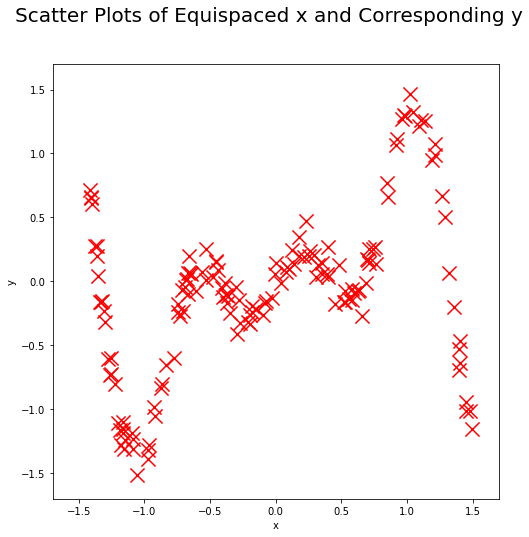

In [16]:
x = np.sort(np.random.uniform(-1.5, 1.5, 150)) #x
y = x*(np.exp(-x**2) + np.cos(6*x))
y = y + np.random.normal(0, 0.1, (1,150)) #y
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Scatter Plots of Equispaced x and Corresponding y", size=20)
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.set(ylabel='y', xlabel='x')
plt.scatter(x,y, marker='x', color='red', s=200)

## Q4-Part b
Suppose ${x_{M_1} < -0.5 \leq x_{M_1 + 1}}$ and ${x_{M_2} < 0.5 \leq x_{M_2 + 1}}$ for some integers ${M_1}$ and ${M_2}$. Derive the necessary conditions for satisfying continuity requirements, and express the piecewise polynomial fitting problem as an optimization problem in the form of (see page
341 of [IALA](http://vmls-book.stanford.edu/vmls.pdf)):

minimize ${||Ac - y||^2}$

subject to ${Cc = d}$

This normally is a least-squares problem of finding the best fitting polynomial function of degree ${4^{th}}$ for each interval seperately. However, as mentioned at the beginning of the question, the function has **continuous ${1^{st}}$ and ${2^{nd}}$ derivatives** on the domain. Existence of derivative at a point implies that the function is continuous at the point of interest. 

Hence addition to the least-squares minimization, there are ***continuity contraints*** of degree *0* (function itself), *1* and *2* to be satisfied in the domain of ${x \in [-1.5, 1.5]}$. Fitting ${4^{th}}$ degree polynomials, the existence of continuous ${1^{st}}$ and ${2^{nd}}$ derivatives and as well as the continuity of the function in the sub-regions of these polynomials are guaranteed. The points that needs to be taken care of and ensured via constraints are ${-0.5}$ and ${0.5}$ where the polynomials change from one to anohter. This means that, for each of these two points *3* different constraints are needed leading to *6* constraints in total. 

For the continuity of the function and its ${1^{st}}$ and ${2^{nd}}$ derivative in these points, the requirements from algebra are,

lim ${x \to -0.5^- \hat f(x) = }$ lim ${x \to -0.5^+ \hat f(x)}$

lim ${x \to -0.5^- \hat f'(x) = }$ lim ${x \to -0.5^+ \hat f'(x)}$

lim ${x \to -0.5^- \hat f''(x) = }$ lim ${x \to -0.5^+ \hat f''(x)}$

lim ${x \to 0.5^- \hat f(x) = }$ lim ${x \to 0.5^+ \hat f(x)}$

lim ${x \to 0.5^- \hat f'(x) = }$ lim ${x \to 0.5^+ \hat f'(x)}$

lim ${x \to 0.5^- \hat f''(x) = }$ lim ${x \to 0.5^+ \hat f''(x)}$

More clearly,

${p_1(-0.5) = p_2(-0.5)}$

${p'_1(-0.5) = p'_2(-0.5)}$

${p''_1(-0.5) = p''_2(-0.5)}$

${p_2(0.5) = p_3(30.5)}$

${p'_2(0.5) = p'_3(0.5)}$

${p''_2(0.5) = p''_3(0.5)}$

So,

${c_0 + (-0.5)c_1 + (-0.5)^2c_2 + (-0.5)^3c_3 + (-0.5)^4c_4 = c_5 + (-0.5)c_6 + (-0.5)^2c_7 + (-0.5)^3c_8 + (-0.5)^4c_9}$

${c_1 + 2(-0.5)c_2 + 3(-0.5)^2c_3 + 4(-0.5)^3c_4 = c_6 + 2(-0.5)c_7 + 3(-0.5)^2c_8 + 4(-0.5)^3c_9}$

${2c_2 + 6(-0.5)c_3 + 12(-0.5)^2c_4 = 2c_7 + 6(-0.5)c_8 + 12(-0.5)^2c_9}$

${c_5 + (0.5)c_6 + (0.5)^2c_7 + (0.5)^3c_8 + (0.5)^4c_9 = c_10 + (0.5)c_11 + (0.5)^2c_12 + (0.5)^3c_13 + (0.5)^4c_14}$

${c_6 + 2(0.5)c_7 + 3(0.5)^2c_8 + 4(0.5)^3c_9 = c_11 + 2(0.5)c_12 + 3(0.5)^2c_13 + 4(0.5)^3c_14}$

${2c_7 + 6(0.5)c_8 + 12(0.5)^2c_9 = 2c_12 + 6(0.5)c_13 + 12(0.5)^2c_14}$

are the necessary conditions and satisfying requirements. Once these are found with the help of the formulation on [IALA](http://vmls-book.stanford.edu/vmls.pdf) problem can be expressed as a **constrained least-squares problem** with,

minimize ${||Ac - y||^2}$

subject to ${Cc = d}$

where,

${A = \begin{bmatrix} (1) & x_1 & {x_1}^2 & {x_1}^3 & {x_1}^4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ .&.&.&.&.&.&.&.&.&.&.&.&.&.&. \\ (1) & x_{M_1} & {x_{M_1}}^2 & {x_{M_1}}^3 & {x_{M_1}}^4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & x_{M_1 + 1} & {x_{M_1 + 1}}^2 & {x_{M_1 + 1}}^3 & {x_{M_1 + 1}}^4 & 0 & 0 & 0 & 0 & 0 \\ .&.&.&.&.&.&.&.&.&.&.&.&.&.&. \\ 0 & 0 & 0 & 0 & 0 & 1 & x_{M_2} & {x_{M_2}}^2 & {x_{M_2}}^3 & {x_{M_2}}^4 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & x_{M_2 + 1} & {x_{M_2 + 1}}^2 & {x_{M_2 + 1}}^3 & {x_{M_2 + 1}}^4 \\ .&.&.&.&.&.&.&.&.&.&.&.&.&.&. \\  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & x_{M_{150}} & {x_{M_{150}}}^2 & {x_{M_{150}}}^3 & {x_{M_{150}}}^4\end{bmatrix}}$

${y}$ being the vector of *y*s created for each *x*. And ${C}$ is,

${\begin{bmatrix} (1) & (-0.5) & (-0.5)^2 & (-0.5)^3 & (-0.5)^4 & -(1) & -(-0.5) & -(-0.5)^2 & -(-0.5)^3 & -(-0.5)^4  & 0 & 0 & 0 & 0 & 0\\ (0) & (1) & 2(-0.5) & 3(-0.5)^2 & 4(-0.5)^3 & -(0) & -(1) & -2(-0.5) & -3(-0.5)^2 & -4(-0.5)^3  & 0 & 0 & 0 & 0 & 0\\ (0) & (0) & (2) & 6(-0.5) & 12(-0.5)^2 & -(0) & (0) & -(2) & -6(-0.5) & -12(-0.5)^2 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & (1) & (0.5) & (0.5)^2 & (0.5)^3 & (0.5)^4 & -(1) & -(0.5) & -(0.5)^2 & -(0.5)^3 & -(0.5)^4\\ 0 & 0 & 0 & 0 & 0 & (0) & (1) & 2(0.5) & 3(0.5)^2 & 4(0.5)^3 & -(0) & -(1) & -2(0.5) & -3(0.5)^2 & -4(0.5)^3\\ 0 & 0 & 0 & 0 & 0 & (0) & (0) & (2) & 6(0.5) & 12(0.5)^2 & -(0) & (0) & -(2) & -6(0.5) & -12(0.5)^2\end{bmatrix}}$

Also, ${d}$ is a vector of zeros because of the equality constraints mentioned above. ${d = (0)_{6}}$.

## Q4-Part c
Form ${A}$, ${C}$, and ${d}$, and then plot the heatmaps of ${A^T}$ and ${C}$.

In [17]:
#the vector of x points and higher orders are formed for further calculation
x_all = np.hstack((np.ones((150,1)),np.expand_dims(x, axis=1), np.expand_dims(x**2, axis=1), np.expand_dims(x**3, axis=1), np.expand_dims(x**4, axis=1)))
m1 = np.argmax(x[x<-0.5]) #49 are in first interval
m2 = np.argmax(x[x<0.5])  #89 are in first or second interval
#the x values are splitted into intervals of p1, p2, p2
p1 = x_all[0:m1+1:]
p2 = x_all[m1+1:m2+1:]
p3 = x_all[m2+1:]
len(p1) + len(p2) + len(p3)

150

In [18]:
p1 = np.hstack((p1, np.zeros((len(p1),10)))) #forming blocks of A
p2 = np.hstack((np.zeros((len(p2),5)), p2, np.zeros((len(p2),5)))) #forming blocks of A
p3 = np.hstack((np.zeros((len(p3),10)), p3)) #forming blocks of A
A = np.vstack((p1, p2, p3)) #forming A

d = np.zeros((6,1)) #d is formed

#the algorithm to form C is just an application, there are lots of possible ways
C_1 = np.zeros((1,15))
C_4 = np.zeros((1,15))
for i in range(0,15):
    if i < 5:
        C_1[0,i] = (-0.5)**i
        C_4[0,i+5] = (0.5)**i
    elif i < 10:
        C_1[0,i] = -(-0.5)**(i-5)
        C_4[0,i+5] = -(0.5)**(i-5)
        
C_2 = np.zeros((1,15))
C_5 = np.zeros((1,15))
for i in range(0,15):
    if i > 0 and i < 5:
        C_2[0,i] = i*((-0.5)**(i-1))
        C_5[0,i+5] = i*((0.5)**(i-1))
    elif i > 5 and i < 10:
        C_2[0,i] = -(i-5)*((-0.5)**(i-6))
        C_5[0,i+5] = -(i-5)*((0.5)**(i-6))
        
C_3 = np.zeros((1,15))
C_6 = np.zeros((1,15))
for i in range(0,15):
    if i > 1 and i < 5:
        C_3[0,i] = i*(i-1)*((-0.5)**(i-2))
        C_6[0,i+5] = i*(i-1)*((0.5)**(i-2))
    elif i > 6 and i < 10:
        C_3[0,i] = -(i-5)*(i-6)*((-0.5)**(i-7))
        C_6[0,i+5] = -(i-5)*(i-6)*((0.5)**(i-7))
        
C = np.vstack((C_1, C_2, C_3, C_4, C_5, C_6)) #C is formed by concetanating the rows

<AxesSubplot:>

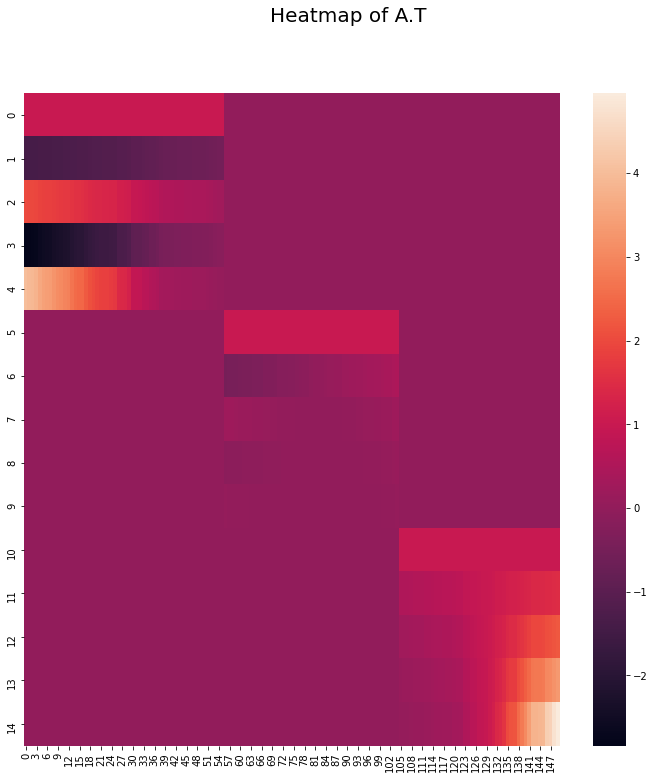

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle("Heatmap of A.T", size=20)
sns.heatmap(A.T, cmap="rocket")

<AxesSubplot:>

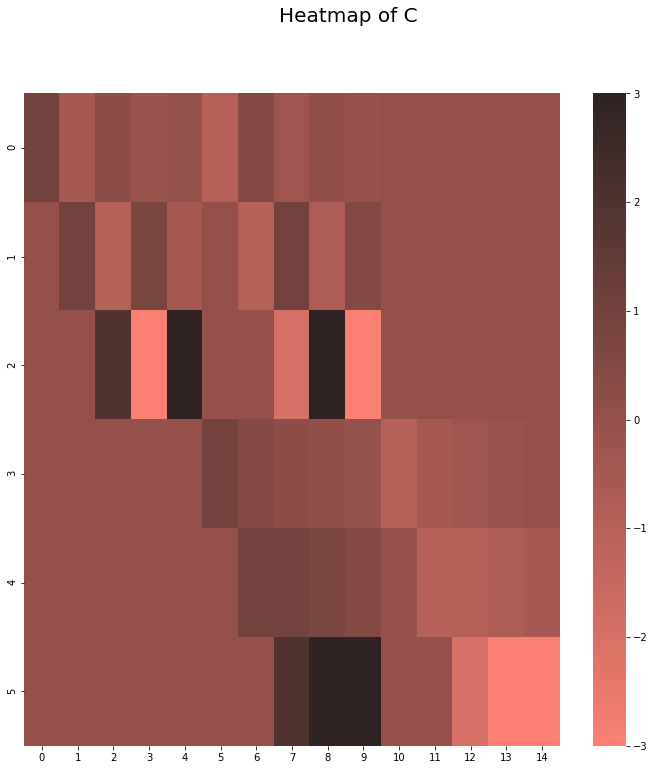

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
fig.suptitle("Heatmap of C", size=20)
sns.heatmap(C, cmap=sns.color_palette("dark:salmon_r", as_cmap=True))

## Q4-Part d
Solve the optimization problem for **${c}$** using *constrained least squares via QR factorization
algorithm* (see Algorithm 16.2 on [IALA](http://vmls-book.stanford.edu/vmls.pdf)). Output the vector in the form of a stem-plot.

The [algorithm](http://vmls-book.stanford.edu/vmls.pdf) is,

1. By stacking the matrices ${A}$ and ${C}$ find the ${QR-}$factorization to the newly formed matrix. From the properties of block matrix-matrix multiplication, this ${Q}$ can be splitted into two sub matrices ${Q_1}$ and ${Q_2}$, where ${A = Q_1R}$ and ${C = Q_2R}$. Also compute the ${QR-}$factorization of ${{Q_2}^T}$ as ${\tilde{Q} \tilde{R}}$,

${\begin{bmatrix} A \\ C \end{bmatrix} = \begin{bmatrix} Q_1 \\ Q_2 \end{bmatrix}R}$

${{Q_2}^T = \tilde{Q} \tilde{R}}$

2. Compute ${{\tilde R}^{-T}d}$ directly,

3. Form the equation ${\tilde Rw = 2{\tilde Q}^TQ_1^Tb - 2{\tilde R}^{-T}d}$ to find ${w}$ as,

${w = {\tilde R}^{-1}(2\tilde Q^TQ_1^Tb - 2\tilde R^{-T}d)}$

4. Compute the right-hand-side ${Q_1^Tb - (1/2)Q_2^Tw}$ in the equation ${Rc = Q_1^Tb - (1/2)Q_2^Tw}$ and find ${c}$ as,

${c = R^{-1}(Q_1^Tb - (1/2)Q_2^Tw)}$

When these steps are followed,

<StemContainer object of 3 artists>

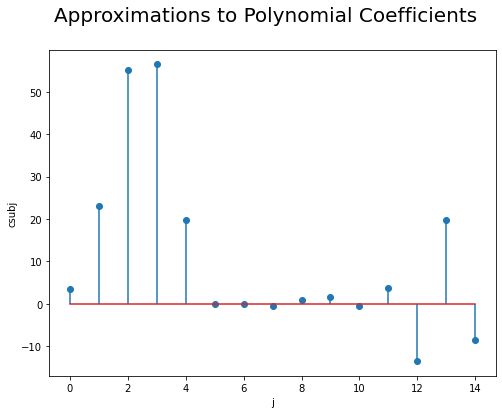

In [21]:
stacked = np.vstack((A,C))                                   #A and C matrices stacked for computation of QR
Q, R = np.linalg.qr(stacked)                                 #QR computed                                
Q1 = Q[0:150,:]                                              #Q's are splitted
Q2 = Q[150:,:]

Qtild, Rtild = np.linalg.qr(Q2.T)                            #computation of Rtilde

firstterm = sp.linalg.inv(Rtild).T@d                         #since d is vector of zeros this is already 0 but calculated anyway

w = 2*(sp.linalg.inv(Rtild)@(Qtild.T@Q1.T)@y.T - firstterm)  #calculation of w

cs = sp.linalg.inv(R)@(Q1.T@y.T - (0.5)*Q2.T@w)              #plugging in w, vector of c's found
fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle("Approximations to Polynomial Coefficients", size=20)
ax.set(ylabel='csubj', xlabel='j')
plt.stem(cs)

## Q4-Part e
Plot the resulting ${\hat f(x)}$ along with the scatter plot of ${x}$ vs ${y}$.

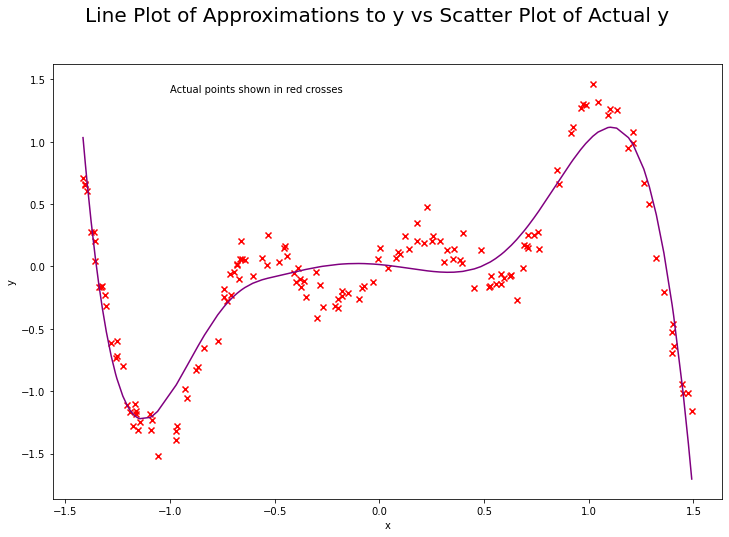

In [22]:
y_appr = A@cs  #calculating approximations to y
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle("Line Plot of Approximations to y vs Scatter Plot of Actual y", size=20)
ax.text(x=-1, y=1.4 , s="Actual points shown in red crosses")
ax.set(ylabel='y', xlabel='x')
ax.scatter(x,y, color="red", marker="x")
ax.plot(x,y_appr, color="purple")

## Q4-Part f
Verify that the resulting ${c}$ satisfies the **KKT conditions**, i.e. there exists a vector for
such that

${\begin{bmatrix} 2A^TA & C^T \\ C & 0 \end{bmatrix}}$ ${\begin{bmatrix} c \\ z \end{bmatrix}}$ ${=}$ ${\begin{bmatrix} 2A^Ty \\ d \end{bmatrix}}$

Output the vector **z** in the form of a stem-plot, and show that the equality above is satisfied.

Another way to solve ***constrained least-squares problem*** is to define **Lagrange Function** defining **Lagrange Multipliers** as,

${L(x, z) = ||Ax-b||^2 + z_1({c_1}^Tx-d_1) + ... + z_p({c_p}^Tx-d_p)}$

The solution to the ***constrained least-squares problem*** are the set of points ${(\hat x, \hat z)}$ that satisfy,

${\frac{\partial L}{\partial x_i}(\hat x, \hat z) = 0}$ and

${\frac{\partial L}{\partial z_i}(\hat x, \hat z) = 0}$ for ${\forall x_i, z_i}$

When these conditions, along with the least-square objectives are written, brought into matrix form and arranged with the process can be found in [VMLS](http://vmls-book.stanford.edu/vmls.pdf),

${\begin{bmatrix} c \\ z \end{bmatrix}}$ is a matrix of ${c}$s (coefficients) and ${z}$s (Lagrange multipliers) that *satisfy* the above equation,

${\begin{bmatrix} 2A^TA & C^T \\ C & 0 \end{bmatrix}}$ ${\begin{bmatrix} c \\ z \end{bmatrix}}$ ${=}$ ${\begin{bmatrix} 2A^Ty \\ d \end{bmatrix}}$ and thus,

${\begin{bmatrix} c \\ z \end{bmatrix}}$ ${=}$ ${\begin{bmatrix} 2A^TA & C^T \\ C & 0 \end{bmatrix}^{-1}}$  ${\begin{bmatrix} 2A^Ty \\ d \end{bmatrix}}$

To show both ${QR-}$decomposition and method of Lagrange multipliers yield the same results, the **best possible** approximations, the difference between ${c}$ part of the vector to be found and the vector of ${c}$ found by ${QR-}$decomposition should be roughly zero (because of rounding there can be very small deviations). Without ${c}$, he rest of the vector to be found is the vector of ${z}$ which are the ***Lagrange multipliers***, that will be shown in stem-plot.

<StemContainer object of 3 artists>

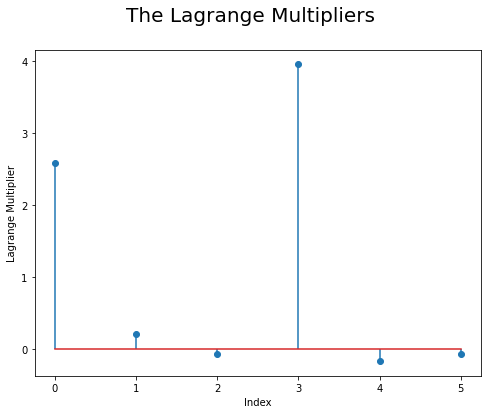

In [23]:
matr = np.vstack((np.hstack(((2*(A.T@A)), (C.T))), np.hstack((C, np.zeros((6,6)))))) #matrix in LHS
right = np.vstack((2*(A.T@y.T), d))                #vector in RHS
new = sp.linalg.inv(matr)@right                    #vector of coefficients and Lagrange multipliers found as matr.new = right and matr-1.right = new

fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle("The Lagrange Multipliers", size=20)
ax.set(ylabel='Lagrange Multiplier', xlabel='Index')
plt.stem(new[15:])

In [24]:
np.round(new[:15]-cs, 8) #calculating the distances

array([[-0.e+00],
       [-1.e-08],
       [-2.e-08],
       [-2.e-08],
       [-1.e-08],
       [-0.e+00],
       [-0.e+00],
       [ 0.e+00],
       [ 0.e+00],
       [-0.e+00],
       [-0.e+00],
       [ 1.e-08],
       [-1.e-08],
       [ 1.e-08],
       [-0.e+00]])

As can be seen the resultant coefficient vectors are the **same**.

## Q4-Part g
For which values of ${D}$ would we still have **feasible** solutions? Explain your answer briefly for the cases where ${D}$ is equal to *0*, *1*, *2* and *3*.

The **feasability** of the system is dependent on the structure of the constraints and whether there is any point or set of points that can satisfy these constraints. The contunuity of the **second** and **first** and the **function** itself are the constraints of the system that can easily be satisfied when ${D}$ is equal to *2* or *3* or greater, since the functions have at least ${2^{nd}}$ order derivatives as well as ${1^{st}}$ that can be made continuous on the points of regime change.

For ${D}$ equals *1* and *0*, the functions can be interpreted as lines with slope (trend line) or straight horizontal lines (constant line). In this case, when the sub-functions are chosen as equal, not only the function itself is continuous but also the left and right limits whilst approaching the points of regime change are the same. Hence in these cases a typical solution is,

${p_1 = p_2 = p_3}$ 

In that way, the costraints are satisfied. Moreover, the objective is minimizing the squared distances. Hence, even if the functions are too far away from the actual points chosen, the solutions are the best that are **feasible**. To minimize the sum of squared distances, in the case of *0*, the functions will be optimized as the overall mean level of the observations in ${y}$. For the case of *1*, the functions will be chosen as the trend line of the points in ${y}$ versus ${x}$. In short, for all cases of ${D}$, there would be some feasible solution.

# Appendices

In [3]:
def house_sales_data():
    # 774 House sales in Sacramento area.
    # Column 1: region (1--4) based on 5-digit ZIP code (see Table 13.4.)
    # Column 2: number of bedrooms.
    # Column 3: number of bathrooms.
    # Column 4: house area in square feet.
    # Column 5: 1 if a condo, 0 otherwise.
    # Column 6: selling price in dollars.

    import numpy as np
    X = np.array([[ 2,   2,   2,    941,   1,     94905],
         [ 2,   3,   2,   1146,   0,     98937],
         [ 2,   3,   2,    909,   0,    100309],
         [ 3,   3,   2,   1289,   0,    106250],
         [ 3,   3,   1,   1020,   0,    107502],
         [ 2,   2,   2,   1022,   0,    108750],
         [ 2,   2,   2,   1134,   1,    110700],
         [ 2,   2,   1,    844,   0,    113263],
         [ 2,   2,   1,    795,   1,    116250],
         [ 2,   2,   1,    588,   0,    120000],
         [ 2,   3,   2,   1356,   0,    121630],
         [ 2,   3,   2,   1118,   0,    122000],
         [ 3,   4,   2,   1329,   0,    122682],
         [ 2,   4,   2,   1240,   0,    123000],
         [ 2,   3,   2,   1601,   0,    124100],
         [ 2,   3,   2,    901,   0,    125000],
         [ 2,   3,   2,   1088,   0,    126640],
         [ 3,   3,   1,    963,   0,    127281],
         [ 3,   3,   2,   1119,   0,    129000],
         [ 2,   4,   2,   1380,   0,    131200],
         [ 3,   3,   2,   1248,   0,    132000],
         [ 3,   2,   2,   1039,   1,    133000],
         [ 2,   3,   2,   1152,   0,    134555],
         [ 2,   3,   2,   1380,   0,    136500],
         [ 2,   3,   2,   1116,   0,    138750],
         [ 3,   2,   2,   1039,   1,    141000],
         [ 3,   3,   2,   1418,   0,    146250],
         [ 2,   3,   2,   1082,   0,    147308],
         [ 3,   4,   2,   1472,   0,    148750],
         [ 3,   4,   2,   1146,   0,    149593],
         [ 2,   1,   1,    760,   1,    150000],
         [ 2,   2,   2,   1304,   1,    152000],
         [ 3,   3,   2,   1207,   0,    154000],
         [ 3,   3,   2,   1056,   0,    156896],
         [ 2,   2,   2,   1043,   0,    161250],
         [ 2,   4,   2,   1587,   0,    161500],
         [ 2,   4,   1,   1120,   0,    164000],
         [ 3,   4,   2,   1580,   0,    165000],
         [ 3,   4,   1,   1955,   0,    166357],
         [ 2,   4,   2,   1656,   0,    166357],
         [ 3,   3,   2,   1477,   0,    168000],
         [ 3,   3,   2,   1188,   0,    170000],
         [ 3,   4,   2,   1590,   0,    173000],
         [ 3,   3,   2,   1463,   0,    174250],
         [ 3,   4,   2,   1714,   0,    174313],
         [ 3,   3,   2,   1185,   0,    178480],
         [ 3,   3,   2,   1406,   0,    178760],
         [ 3,   3,   2,   1172,   0,    181000],
         [ 2,   3,   1,   1152,   0,    181872],
         [ 3,   4,   3,   1851,   0,    182587],
         [ 2,   3,   2,   1215,   0,    182716],
         [ 3,   3,   2,   1130,   0,    182750],
         [ 2,   4,   2,   1603,   0,    183200],
         [ 3,   3,   1,   1479,   0,    188741],
         [ 3,   3,   2,   1420,   0,    189000],
         [ 3,   3,   2,   1280,   0,    192067],
         [ 3,   3,   2,   1586,   0,    194000],
         [ 2,   3,   2,   1362,   0,    194818],
         [ 3,   3,   2,   1266,   0,    198000],
         [ 3,   4,   2,   1715,   0,    199500],
         [ 4,   3,   2,   1820,   0,    200000],
         [ 2,   3,   1,    936,   0,    200000],
         [ 2,   3,   2,   1511,   0,    208000],
         [ 3,   4,   2,   1590,   0,    212864],
         [ 3,   4,   2,   1596,   0,    221000],
         [ 2,   2,   2,   1341,   0,    221000],
         [ 3,   5,   3,   2136,   0,    223058],
         [ 3,   4,   2,   1616,   0,    227887],
         [ 3,   3,   2,   1478,   0,    231477],
         [ 2,   3,   2,   1287,   0,    234697],
         [ 2,   4,   2,   1277,   0,    235000],
         [ 2,   4,   2,   1448,   0,    236000],
         [ 3,   4,   3,   2235,   0,    236685],
         [ 2,   3,   2,   2093,   0,    237800],
         [ 2,   3,   2,   1193,   0,    240122],
         [ 3,   3,   2,   2163,   0,    242638],
         [ 3,   3,   2,   1269,   0,    244000],
         [ 3,   3,   1,    958,   0,    244960],
         [ 3,   5,   3,   2508,   0,    245918],
         [ 2,   3,   2,   1305,   0,    250000],
         [ 3,   4,   2,   1591,   0,    250000],
         [ 2,   2,   2,   1326,   1,    250134],
         [ 3,   3,   2,   1843,   0,    254200],
         [ 2,   4,   2,   1921,   0,    254200],
         [ 3,   5,   3,   2790,   0,    258000],
         [ 2,   3,   2,   1541,   0,    260000],
         [ 3,   3,   1,   1018,   0,    260014],
         [ 2,   3,   2,   1672,   1,    265000],
         [ 3,   3,   1,    975,   0,    271742],
         [ 3,   4,   3,   2372,   0,    273750],
         [ 3,   3,   2,   1446,   0,    275086],
         [ 3,   4,   3,   3009,   0,    280987],
         [ 3,   4,   2,   2056,   0,    285000],
         [ 3,   4,   2,   1993,   0,    287417],
         [ 3,   3,   2,   1857,   0,    291000],
         [ 1,   2,   1,   1126,   0,    292024],
         [ 3,   5,   3,   2494,   0,    297000],
         [ 3,   3,   2,   1843,   0,    298000], 
         [ 2,   2,   2,   1520,   0,    299000],
         [ 2,   5,   3,   2800,   0,    304037],
         [ 3,   4,   2,   2309,   0,    311000],
         [ 2,   5,   3,   2367,   0,    315537],
         [ 2,   5,   4,   3516,   0,    320000],
         [ 3,   4,   3,   1914,   0,    328360],
         [ 2,   2,   1,   1690,   0,    334150],
         [ 3,   3,   3,   2725,   0,    335750],
         [ 3,   4,   3,   2354,   0,    335750],
         [ 4,   3,   2,   2185,   0,    344250],
         [ 3,   4,   2,   1801,   0,    346210],
         [ 3,   3,   3,   1961,   0,    347029],
         [ 3,   4,   2,   3134,   0,    347650],
         [ 3,   4,   3,   1915,   0,    351300],
         [ 2,   4,   3,   2734,   0,    370500],
         [ 3,   3,   2,   2110,   0,    372000],
         [ 3,   5,   3,   3164,   0,    375000],
         [ 2,   5,   3,   3599,   0,    381300],
         [ 3,   4,   2,   2054,   0,    381942],
         [ 2,   4,   2,   1830,   0,    387731],
         [ 1,   3,   3,   1627,   0,    391000],
         [ 3,   4,   3,   3440,   0,    394470],
         [ 4,   3,   2,   2846,   0,    395000],
         [ 3,   4,   3,   2359,   0,    400186],
         [ 3,   3,   3,   2052,   0,    415000],
         [ 3,   5,   3,   3433,   0,    425000],
         [ 2,   5,   3,   3615,   0,    430000],
         [ 4,   5,   3,   2687,   0,    460000],
         [ 3,   4,   3,   2724,   0,    461000],
         [ 3,   4,   3,   3440,   0,    489332],
         [ 3,   5,   4,   3508,   0,    510000],
         [ 4,   4,   2,   2462,   0,    539000],
         [ 2,   3,   3,   2325,   0,    660000],
         [ 2,   2,   1,    795,   1,     69000],
         [ 1,   4,   2,   1099,   0,     70000],
         [ 3,   2,   1,    840,   1,     71000],
         [ 2,   2,   1,    800,   0,     78000],
         [ 3,   2,   1,    746,   0,     78400],
         [ 3,   3,   1,   1067,   0,     80000],
         [ 2,   4,   2,   1316,   0,     89000],
         [ 2,   3,   1,   1337,   0,     90000],
         [ 3,   2,   1,    868,   0,     90000],
         [ 3,   3,   1,    924,   0,     92000],
         [ 3,   2,   1,    610,   0,     93675],
         [ 2,   2,   1,   1220,   0,     98000],
         [ 3,   1,   1,    722,   1,     98000],
         [ 2,   3,   1,   1643,   0,     99000],
         [ 3,   1,   1,    722,   1,    100000],
         [ 3,   3,   1,   1080,   0,    106716],
         [ 3,   3,   1,   1039,   0,    111000],
         [ 2,   3,   1,   1051,   0,    111000],
         [ 2,   2,   2,    967,   0,    114800],
         [ 2,   3,   1,   1098,   0,    120108],
         [ 3,   3,   1,   1050,   0,    123225],
         [ 2,   3,   2,   1110,   0,    123750],
         [ 2,   3,   1,    888,   0,    125000],
         [ 3,   3,   2,   1120,   0,    125000],
         [ 2,   3,   2,   1080,   0,    126000],
         [ 2,   3,   1,    957,   0,    129000],
         [ 2,   2,   1,    952,   0,    134000],
         [ 2,   3,   2,   1211,   0,    135000],
         [ 2,   3,   2,   1264,   0,    135500],
         [ 2,   3,   1,   1080,   0,    140000],
         [ 3,   3,   2,   1266,   0,    140000],
         [ 2,   2,   2,    994,   1,    142500],
         [ 2,   3,   2,   1202,   0,    143500],
         [ 3,   2,   1,    722,   0,    145000],
         [ 3,   4,   2,   1448,   0,    145000],
         [ 3,   3,   2,   1188,   0,    145000],
         [ 2,   4,   2,   1183,   0,    146000],
         [ 3,   3,   1,   1320,   0,    148500],
         [ 3,   3,   2,   1117,   0,    149000],
         [ 3,   3,   2,   1364,   0,    150000],
         [ 3,   4,   2,   1310,   0,    150000],
         [ 3,   2,   2,   1006,   0,    152000],
         [ 2,   3,   2,   1104,   0,    156000],
         [ 2,   2,   1,    810,   0,    156000],
         [ 3,   2,   2,   1123,   0,    156000],
         [ 2,   2,   1,    904,   0,    157788],
         [ 2,   3,   2,   1156,   0,    161653],
         [ 3,   2,   1,   1321,   0,    161829],
         [ 2,   3,   2,   1392,   0,    165000],
         [ 3,   3,   2,   1439,   0,    168000],
         [ 2,   3,   2,   1159,   0,    169000],
         [ 2,   3,   2,   1671,   0,    175000],
         [ 3,   3,   2,   1740,   0,    176250],
         [ 3,   3,   2,   1265,   0,    179000],
         [ 2,   2,   2,   1007,   0,    180000],
         [ 3,   3,   2,   1716,   0,    180400],
         [ 3,   4,   2,   1685,   0,    182000],
         [ 2,   4,   2,   1829,   0,    184500],
         [ 3,   3,   2,   1555,   0,    185000],
         [ 2,   4,   2,   1120,   0,    189000],
         [ 2,   3,   2,   1137,   0,    194000],
         [ 3,   3,   1,   1174,   0,    195000],
         [ 2,   3,   2,   1393,   0,    200000],
         [ 3,   3,   2,   1289,   0,    205000],
         [ 2,   4,   2,   1799,   0,    205000],
         [ 3,   4,   3,   1953,   0,    205000],
         [ 3,   2,   1,    723,   0,    207000],
         [ 2,   4,   2,   1578,   0,    215000],
         [ 2,   3,   2,   1317,   0,    215000],
         [ 3,   3,   1,   1360,   0,    222381],
         [ 2,   3,   2,   1522,   0,    225000],
         [ 2,   4,   2,   1751,   0,    225000],
         [ 3,   3,   2,   1465,   0,    225000],
         [ 3,   4,   2,   1605,   0,    228000],
         [ 2,   4,   2,   1475,   0,    229665],
         [ 4,   3,   1,   1216,   0,    230000],
         [ 2,   2,   2,   1315,   0,    230000],
         [ 3,   3,   2,   1567,   0,    230000],
         [ 2,   3,   2,   1776,   0,    234000],
         [ 2,   3,   2,   2187,   0,    235000],
         [ 3,   3,   1,   1291,   0,    236250],
         [ 2,   3,   2,   1503,   0,    245000],
         [ 3,   4,   3,   2491,   0,    245000],
         [ 1,   2,   1,   1269,   0,    245000],
         [ 2,   3,   2,   1176,   0,    250000],
         [ 2,   4,   2,   1456,   0,    250000],
         [ 4,   3,   2,   1498,   0,    250000],
         [ 2,   3,   2,   1574,   0,    255000],
         [ 3,   3,   2,   2170,   0,    257729],
         [ 3,   4,   2,   1595,   0,    260000],
         [ 2,   3,   2,   1567,   0,    261000],
         [ 3,   4,   2,   1253,   0,    264469],
         [ 2,   4,   3,   1768,   0,    265000],
         [ 2,   4,   3,   2030,   0,    270000],
         [ 2,   3,   2,   1531,   0,    270000],
         [ 3,   4,   3,   1653,   0,    275000],
         [ 3,   4,   2,   2056,   0,    275000],
         [ 3,   4,   3,   2494,   0,    280000],
         [ 2,   3,   2,   1450,   0,    286013],
         [ 2,   4,   2,   2169,   0,    292000],
         [ 4,   3,   2,   1440,   0,    292000],
         [ 2,   3,   2,   1527,   0,    293993],
         [ 4,   3,   2,   1401,   0,    294000],
         [ 2,   3,   2,   1411,   0,    296769],
         [ 2,   3,   1,   1284,   0,    300000],
         [ 3,   4,   3,   2307,   0,    300000],
         [ 2,   4,   2,   1910,   0,    300500],
         [ 2,   3,   2,   1981,   0,    305000],
         [ 3,   4,   2,   2205,   0,    319789],
         [ 4,   2,   2,   1449,   0,    330000],
         [ 4,   3,   2,   1258,   0,    330000],
         [ 3,   3,   2,   2575,   0,    331000],
         [ 3,   2,   1,    539,   0,    334000],
         [ 2,   4,   3,   2208,   0,    336000],
         [ 1,   3,   1,   1108,   0,    339000],
         [ 4,   4,   2,   1595,   0,    339000],
         [ 3,   4,   2,   2159,   0,    345000],
         [ 4,   3,   2,   1838,   0,    356000],
         [ 3,   4,   2,   1900,   0,    361745],
         [ 1,   4,   2,   1718,   0,    361948],
         [ 3,   5,   3,   3389,   0,    370000],
         [ 3,   5,   4,   3260,   0,    385000],
         [ 4,   3,   2,   2016,   0,    399000],
         [ 4,   4,   2,   2607,   0,    402000],
         [ 3,   4,   3,   2724,   0,    406026],
         [ 3,   5,   4,   3746,   0,    420000],
         [ 2,   4,   2,   3192,   0,    425000],
         [ 1,   2,   1,   1247,   0,    445000],
         [ 4,   4,   2,   2581,   0,    450000],
         [ 2,   3,   1,   2068,   0,    460000],
         [ 3,   4,   3,   3992,   0,    460000],
         [ 2,   4,   4,   3397,   0,    465000],
         [ 2,   5,   3,   3881,   0,    471750],
         [ 2,   2,   2,   1598,   0,    484000],
         [ 3,   4,   3,   3070,   0,    495000],
         [ 3,   5,   3,   3984,   0,    572500],
         [ 2,   4,   2,   2222,   0,    582000],
         [ 4,   4,   3,   3838,   0,    613401],
         [ 2,   5,   5,   2846,   0,    680000],
         [ 1,   5,   2,   2484,   0,    699000],
         [ 2,   3,   1,    970,   0,     61500],
         [ 1,   2,   1,    623,   0,     62050],
         [ 3,   2,   1,    932,   0,     65000],
         [ 2,   2,   1,    796,   0,     65000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 3,   2,   1,    834,   0,     68000],
         [ 2,   2,   1,    924,   1,     77000],
         [ 2,   2,   1,    795,   1,     82732],
         [ 2,   3,   1,   1250,   0,     84000],
         [ 3,   2,   1,    984,   0,     84675],
         [ 3,   3,   1,   1013,   0,     85000],
         [ 3,   3,   1,   1012,   0,     90000],
         [ 3,   2,   1,    795,   1,     90000],
         [ 2,   2,   2,    918,   0,     91000],
         [ 2,   3,   1,   1082,   0,     95000],
         [ 2,   2,   1,    964,   0,     97500],
         [ 3,   1,   1,    625,   1,    100000],
         [ 2,   2,   1,    888,   0,    101000],
         [ 2,   4,   2,   1120,   0,    102750],
         [ 2,   3,   1,   1331,   0,    112500],
         [ 2,   3,   1,   1014,   0,    113000],
         [ 3,   4,   2,   1448,   0,    114000],
         [ 2,   3,   1,    966,   0,    114000],
         [ 3,   2,   1,    779,   0,    114750],
         [ 2,   2,   2,    836,   1,    115000],
         [ 4,   2,   2,   1100,   1,    115000],
         [ 3,   3,   1,   1174,   0,    116100],
         [ 2,   3,   2,   1207,   0,    119250],
         [ 3,   2,   1,    804,   0,    120000],
         [ 2,   2,   2,    958,   1,    120000],
         [ 3,   3,   2,   1366,   0,    120108],
         [ 3,   2,   2,    901,   0,    121500],
         [ 2,   3,   1,    696,   0,    121725],
         [ 3,   3,   2,   1080,   0,    122000],
         [ 3,   3,   2,   1104,   0,    123000],
         [ 2,   2,   1,    972,   0,    125000],
         [ 2,   4,   2,   1390,   0,    125573],
         [ 2,   4,   2,   1354,   0,    126714],
         [ 3,   2,   1,    795,   1,    126960],
         [ 4,   2,   1,    780,   1,    127000],
         [ 3,   4,   2,   1587,   0,    127500],
         [ 2,   3,   2,   1209,   0,    130000],
         [ 3,   2,   1,   1139,   0,    133105],
         [ 2,   2,   2,   1690,   0,    136500],
         [ 2,   3,   2,   1245,   1,    139500],
         [ 2,   3,   2,   1416,   0,    140000],
         [ 3,   3,   2,   1300,   0,    140800],
         [ 3,   3,   2,   1120,   0,    145000],
         [ 3,   4,   2,   1590,   0,    147000],
         [ 3,   3,   2,   1407,   0,    149600],
         [ 3,   5,   2,   1516,   0,    150000],
         [ 3,   3,   2,   1646,   0,    150000],
         [ 3,   3,   2,   1676,   0,    155000],
         [ 2,   3,   2,   1370,   0,    155435],
         [ 2,   3,   2,   1370,   0,    155500],
         [ 2,   4,   2,   1351,   0,    158000],
         [ 2,   3,   2,   1152,   0,    158000],
         [ 3,   3,   2,   1452,   0,    160000],
         [ 4,   2,   1,    990,   0,    160000],
         [ 2,   2,   2,   1162,   0,    164000],
         [ 2,   3,   2,   1182,   0,    164000],
         [ 3,   2,   2,   1112,   0,    165000],
         [ 3,   3,   2,   1100,   0,    167000],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 2,   4,   2,   1280,   0,    167293],
         [ 3,   3,   1,   1039,   0,    168000],
         [ 2,   3,   2,   1159,   0,    170000],
         [ 2,   4,   2,   1917,   0,    170000],
         [ 2,   3,   2,   1520,   0,    170000],
         [ 3,   3,   2,   1204,   0,    174000],
         [ 2,   3,   2,   1120,   0,    178000],
         [ 3,   3,   2,   1436,   0,    180000],
         [ 3,   3,   2,   1451,   0,    180000],
         [ 3,   4,   2,   1638,   0,    180000],
         [ 2,   2,   2,   1000,   1,    182000],
         [ 4,   3,   1,   1152,   0,    188325],
         [ 4,   3,   2,   1154,   0,    191500],
         [ 2,   3,   2,   1353,   0,    192000],
         [ 2,   3,   2,   1329,   0,    192700],
         [ 3,   3,   1,   1356,   0,    195000],
         [ 2,   3,   2,   1505,   0,    197654],
         [ 2,   3,   1,   1009,   0,    198000],
         [ 3,   3,   2,   1144,   0,    200345],
         [ 2,   2,   1,    930,   0,    203000],
         [ 2,   4,   2,   1766,   0,    207000],
         [ 3,   4,   3,   1940,   0,    208000],
         [ 3,   4,   2,   1776,   0,    210000],
         [ 2,   3,   1,   1258,   0,    212000],
         [ 3,   4,   2,   1872,   0,    213675],
         [ 3,   2,   2,   1112,   0,    213697],
         [ 2,   4,   2,   1856,   0,    215000],
         [ 1,   4,   3,   1939,   0,    215000],
         [ 4,   3,   1,    998,   0,    215100],
         [ 4,   3,   2,   1758,   0,    217500],
         [ 2,   3,   2,   2142,   0,    218000],
         [ 3,   2,   1,    950,   0,    220000],
         [ 3,   4,   3,   1739,   0,    221000],
         [ 3,   3,   2,   1516,   0,    222900],
         [ 2,   3,   1,    988,   0,    223139],
         [ 3,   4,   2,   1555,   0,    225500],
         [ 3,   3,   2,   1212,   0,    228327],
         [ 2,   4,   2,   1871,   0,    230000],
         [ 3,   3,   2,   1302,   0,    230000],
         [ 2,   2,   1,    756,   1,    230522],
         [ 2,   4,   3,   2026,   0,    231200],
         [ 3,   3,   2,   1375,   0,    232000],
         [ 2,   2,   2,   1250,   1,    232500],
         [ 3,   3,   1,   1058,   0,    233641],
         [ 2,   3,   2,   1187,   0,    234000],
         [ 3,   2,   2,   1324,   0,    234500],
         [ 3,   4,   3,   1936,   0,    235000],
         [ 4,   3,   2,   1427,   0,    236073],
         [ 2,   3,   2,   1678,   1,    238000],
         [ 3,   4,   2,   1798,   0,    238861],
         [ 2,   4,   3,   2652,   0,    239700],
         [ 3,   4,   2,   1816,   0,    240000],
         [ 2,   5,   3,   3076,   0,    240000],
         [ 3,   4,   2,   1844,   0,    241000],
         [ 3,   3,   2,   1306,   0,    245000],
         [ 2,   4,   3,   2447,   0,    246000],
         [ 3,   4,   2,   1176,   0,    247234],
         [ 2,   4,   2,   1182,   0,    247480],
         [ 2,   3,   1,   1160,   0,    249862],
         [ 2,   3,   2,   1424,   0,    251000],
         [ 2,   4,   2,   1574,   0,    252155],
         [ 2,   3,   2,   1830,   0,    254172],
         [ 3,   4,   2,   1724,   0,    258000],
         [ 4,   2,   2,   1255,   1,    260000],
         [ 2,   4,   3,   2175,   0,    261000],
         [ 2,   4,   2,   1904,   0,    261000],
         [ 4,   4,   2,   1808,   0,    262500],
         [ 2,   4,   2,   2711,   0,    266000],
         [ 2,   3,   1,   1713,   0,    266000],
         [ 3,   3,   2,   1457,   0,    270000],
         [ 3,   4,   3,   2724,   0,    274425],
         [ 3,   3,   2,   1468,   0,    275336],
         [ 2,   4,   3,   2550,   0,    277980],
         [ 3,   4,   2,   1928,   0,    280000],
         [ 1,   3,   3,   1922,   0,    284686],
         [ 2,   3,   2,   1343,   0,    284893],
         [ 4,   3,   2,   1510,   0,    285000],
         [ 2,   4,   2,   1559,   0,    285000],
         [ 3,   5,   3,   2992,   0,    295000],
         [ 3,   4,   2,   2109,   0,    296000],
         [ 2,   4,   2,   1524,   0,    296056],
         [ 3,   3,   2,   1248,   0,    297359],
         [ 3,   4,   2,   1876,   0,    299940],
         [ 2,   4,   3,   1851,   0,    305000],
         [ 2,   4,   2,   2218,   0,    311328],
         [ 3,   3,   2,   1394,   0,    313138],
         [ 3,   3,   2,   1410,   0,    316630],
         [ 3,   5,   3,   3468,   0,    320000],
         [ 2,   5,   3,   2346,   0,    320000],
         [ 2,   5,   3,   2347,   0,    325000],
         [ 2,   4,   2,   1659,   0,    328578],
         [ 3,   3,   3,   2442,   0,    331000],
         [ 2,   4,   2,   2155,   0,    340000],
         [ 3,   3,   2,   1810,   0,    345746],
         [ 3,   4,   2,   2789,   0,    351000],
         [ 3,   4,   2,   1606,   0,    353767],
         [ 2,   4,   2,   2166,   0,    356035],
         [ 2,   4,   2,   1871,   0,    360552],
         [ 2,   3,   2,   1800,   0,    362305],
         [ 1,   3,   1,   1683,   0,    365000],
         [ 4,   2,   2,   1596,   0,    370000],
         [ 3,   3,   2,   1179,   0,    378000],
         [ 1,   3,   1,   1639,   0,    388000],
         [ 2,   5,   3,   3281,   0,    395100],
         [ 1,   3,   2,   1697,   0,    400000],
         [ 2,   4,   3,   2085,   0,    408431],
         [ 4,   4,   3,   1939,   0,    423000],
         [ 1,   2,   3,   1788,   0,    427500],
         [ 4,   3,   2,   1691,   0,    430922],
         [ 3,   4,   2,   2002,   0,    445000],
         [ 3,   4,   4,   4303,   0,    450000],
         [ 2,   5,   3,   4246,   0,    452000],
         [ 4,   3,   2,   2274,   0,    470000],
         [ 2,   4,   4,   3056,   0,    475000],
         [ 3,   3,   3,   2503,   0,    484500],
         [ 4,   3,   2,   1905,   0,    500000],
         [ 4,   3,   2,   1320,   0,    506688],
         [ 2,   4,   2,   3037,   0,    528000],
         [ 3,   5,   2,   3741,   0,    579093],
         [ 4,   4,   3,   2660,   0,    636000],
         [ 2,   4,   3,   3357,   0,    668365],
         [ 4,   5,   3,   2896,   0,    676200],
         [ 3,   5,   3,   3788,   0,    691659],
         [ 3,   2,   1,    838,   0,     55422],
         [ 2,   2,   1,    904,   0,     63000],
         [ 2,   2,   1,   1032,   0,     65000],
         [ 2,   2,   1,    904,   0,     65000],
         [ 1,   2,   1,   1080,   0,     65000],
         [ 3,   2,   2,    990,   0,     66500],
         [ 2,   2,   1,    900,   0,     71000],
         [ 3,   2,   1,    861,   0,     75000],
         [ 3,   2,   1,    906,   1,     77000],
         [ 2,   2,   1,   1011,   0,     85000],
         [ 3,   3,   2,   1089,   0,     95625],
         [ 2,   2,   1,    832,   0,     96140],
         [ 3,   2,   1,    800,   1,    104250],
         [ 2,   4,   2,   1292,   0,    105000],
         [ 3,   2,   1,    810,   0,    108000],
         [ 2,   4,   2,   1064,   0,    109000],
         [ 2,   2,   1,    911,   0,    115000],
         [ 2,   1,   1,    846,   1,    115000],
         [ 2,   3,   2,   1320,   0,    115500],
         [ 2,   3,   2,   1410,   0,    115620],
         [ 2,   3,   2,   1115,   0,    116000],
         [ 3,   3,   2,   1169,   0,    122000],
         [ 3,   3,   2,   1164,   0,    122500],
         [ 3,   4,   2,   1341,   0,    123000],
         [ 2,   3,   2,   1219,   0,    124000],
         [ 2,   4,   2,   1127,   0,    124000],
         [ 2,   3,   2,   1272,   0,    124413],
         [ 3,   4,   2,   1253,   0,    125000],
         [ 3,   3,   2,   1120,   0,    130000],
         [ 2,   2,   2,   1118,   0,    131750],
         [ 2,   4,   3,   1890,   0,    137721],
         [ 2,   3,   2,   1260,   0,    137760],
         [ 3,   3,   2,   1400,   0,    138000],
         [ 2,   3,   1,   1264,   0,    140000],
         [ 3,   3,   1,   1060,   0,    145000],
         [ 3,   2,   2,   1132,   0,    145000],
         [ 3,   3,   2,   1466,   0,    150000],
         [ 2,   3,   2,   1092,   0,    150000],
         [ 3,   4,   2,   1628,   0,    151000],
         [ 2,   3,   2,    960,   0,    155000],
         [ 2,   3,   2,   1075,   0,    155800],
         [ 3,   3,   2,   1428,   0,    156142],
         [ 3,   4,   2,   1358,   0,    158000],
         [ 2,   3,   2,   1410,   0,    160000],
         [ 2,   3,   2,   1711,   0,    161500],
         [ 3,   4,   2,   1483,   0,    161600],
         [ 3,   3,   2,   1140,   0,    162000],
         [ 3,   4,   2,   1549,   0,    165000],
         [ 3,   3,   2,   1410,   0,    165000],
         [ 3,   3,   2,   1240,   0,    167293],
         [ 2,   5,   2,   1712,   0,    168000],
         [ 3,   4,   2,   1580,   0,    168000],
         [ 2,   3,   2,   1669,   0,    168750],
         [ 3,   3,   1,   1029,   0,    168750],
         [ 2,   3,   1,   1103,   0,    170000],
         [ 3,   3,   2,   2161,   0,    170250],
         [ 3,   3,   2,   1650,   0,    173000],
         [ 3,   3,   2,   1200,   0,    176095],
         [ 2,   3,   2,   1170,   0,    176250],
         [ 2,   3,   2,   1199,   0,    178000],
         [ 3,   4,   2,   1695,   0,    179000],
         [ 2,   3,   2,   1157,   0,    180000],
         [ 2,   3,   2,   1410,   0,    180000],
         [ 4,   3,   2,   1174,   0,    180000],
         [ 3,   3,   2,   1593,   0,    181000],
         [ 2,   3,   2,   1093,   0,    182000],
         [ 4,   3,   2,   1770,   0,    182587],
         [ 3,   4,   2,   1436,   0,    185074],
         [ 3,   3,   2,   1124,   0,    185833],
         [ 3,   4,   2,   1139,   0,    186785],
         [ 3,   3,   2,   1638,   0,    187000],
         [ 2,   3,   2,   1328,   0,    188335],
         [ 3,   3,   2,   1273,   0,    190000],
         [ 2,   3,   1,   1082,   0,    190000],
         [ 2,   4,   2,   1578,   0,    190000],
         [ 4,   2,   1,    796,   0,    190000],
         [ 3,   3,   2,   1386,   0,    191250],
         [ 2,   3,   2,   1452,   0,    193000],
         [ 3,   3,   2,   1513,   0,    193500],
         [ 2,   4,   2,   1578,   0,    195000],
         [ 2,   4,   3,   1736,   0,    195000],
         [ 2,   3,   1,   1473,   0,    195000],
         [ 3,   3,   1,   1150,   0,    198000],
         [ 2,   3,   2,   1127,   0,    199900],
         [ 2,   3,   1,   1144,   0,    200000],
         [ 2,   3,   1,    972,   0,    201000],
         [ 3,   4,   2,   2306,   0,    204918],
         [ 2,   3,   2,   1479,   0,    205000],
         [ 2,   3,   2,   1430,   0,    205878],
         [ 3,   4,   2,   1800,   0,    207000],
         [ 2,   4,   2,   1953,   0,    207744],
         [ 2,   3,   2,   1120,   0,    209000],
         [ 2,   3,   2,   1232,   0,    210000],
         [ 2,   1,   1,    984,   1,    210944],
         [ 3,   4,   2,   2329,   0,    213750],
         [ 3,   3,   2,   1351,   0,    215000],
         [ 4,   4,   1,   1376,   0,    215000],
         [ 2,   4,   2,   1566,   0,    220000],
         [ 1,   2,   1,   1115,   0,    220000],
         [ 1,   2,   1,   1032,   0,    220000],
         [ 2,   4,   2,   1419,   0,    220000],
         [ 3,   3,   2,   1261,   0,    220000],
         [ 2,   2,   2,   1637,   0,    220702],
         [ 3,   3,   2,   1338,   0,    222000],
         [ 3,   5,   2,   2254,   0,    222750],
         [ 2,   3,   2,   1441,   0,    225000],
         [ 2,   4,   2,   1991,   0,    225000],
         [ 3,   4,   3,   2126,   0,    228750],
         [ 3,   3,   2,   1094,   0,    229000],
         [ 4,   3,   2,   1462,   0,    230095],
         [ 2,   5,   3,   2258,   0,    232500],
         [ 2,   3,   2,   1074,   0,    233000],
         [ 3,   4,   2,   2111,   0,    233500],
         [ 2,   3,   2,   1686,   0,    239000],
         [ 2,   4,   3,   1915,   0,    240000],
         [ 3,   4,   2,   2367,   0,    240000],
         [ 3,   3,   2,   1962,   0,    240971],
         [ 2,   2,   2,   1406,   0,    242000],
         [ 3,   3,   2,   1789,   0,    243450],
         [ 2,   4,   2,   1876,   0,    243500],
         [ 2,   3,   2,   1235,   0,    246544],
         [ 2,   4,   2,   2504,   0,    246750],
         [ 2,   3,   2,   1676,   0,    247000],
         [ 2,   3,   2,   1367,   0,    249000],
         [ 3,   4,   3,   1899,   0,    249000],
         [ 3,   3,   2,   1636,   0,    250000],
         [ 2,   3,   2,   1828,   0,    250000],
         [ 3,   4,   2,   1438,   0,    252000],
         [ 3,   3,   2,   1451,   0,    255000],
         [ 2,   3,   1,   1520,   0,    255000],
         [ 4,   3,   2,   1506,   0,    255000],
         [ 2,   4,   2,   2605,   0,    257200],
         [ 2,   3,   2,   1196,   0,    260000],
         [ 4,   3,   2,   1621,   0,    260000],
         [ 2,   3,   2,   1811,   0,    263500],
         [ 3,   3,   2,   1540,   0,    266510],
         [ 3,   3,   2,   1543,   0,    275000],
         [ 2,   5,   3,   2494,   0,    276000],
         [ 4,   3,   2,   1650,   0,    276500],
         [ 3,   4,   3,   2214,   0,    278000],
         [ 2,   5,   3,   2280,   0,    279000],
         [ 2,   3,   2,   1443,   0,    280000],
         [ 2,   4,   2,   1582,   0,    280000],
         [ 3,   3,   2,   1857,   0,    285000],
         [ 3,   3,   2,   1735,   0,    288000],
         [ 3,   4,   3,   2096,   0,    289000],
         [ 2,   3,   2,   1720,   0,    290000],
         [ 2,   4,   2,   2160,   0,    290000],
         [ 2,   4,   2,   1382,   0,    293996],
         [ 3,   4,   2,   1721,   0,    294173],
         [ 4,   4,   2,   1328,   0,    295000],
         [ 3,   4,   2,   1982,   0,    298000],
         [ 1,   2,   1,   1144,   0,    299000],
         [ 2,   2,   2,   1623,   0,    300000],
         [ 4,   3,   2,   1457,   0,    300000],
         [ 3,   6,   3,   2555,   0,    300000],
         [ 4,   3,   2,   1577,   0,    300567],
         [ 3,   5,   3,   2592,   0,    303000],
         [ 2,   3,   2,   1401,   0,    305000],
         [ 2,   3,   2,   1502,   0,    310000],
         [ 4,   3,   2,   1327,   0,    310000],
         [ 4,   4,   3,   1800,   0,    310000],
         [ 3,   4,   2,   2169,   0,    311518],
         [ 4,   5,   3,   2457,   0,    312000],
         [ 2,   4,   2,   2004,   0,    315000],
         [ 4,   4,   3,   2212,   0,    315000],
         [ 2,   5,   3,   3134,   0,    315000],
         [ 2,   3,   2,   1360,   0,    315000],
         [ 3,   3,   2,   1276,   0,    320000],
         [ 2,   4,   3,   2962,   0,    322000],
         [ 4,   4,   2,   1888,   0,    325000],
         [ 3,   3,   2,   1548,   0,    328370],
         [ 2,   4,   3,   2109,   0,    330000],
         [ 2,   4,   2,   2484,   0,    331200],
         [ 2,   4,   3,   2258,   0,    332000],
         [ 2,   3,   3,   2212,   0,    334000],
         [ 2,   3,   2,   1616,   0,    335000],
         [ 2,   4,   2,   2372,   0,    341000],
         [ 4,   5,   3,   2606,   0,    346375],
         [ 3,   5,   3,   2877,   0,    349000],
         [ 2,   3,   2,   2960,   0,    350000],
         [ 4,   3,   2,   2172,   0,    350000],
         [ 4,   3,   2,   2100,   1,    350000],
         [ 3,   3,   2,   1795,   0,    351000],
         [ 4,   4,   2,   2295,   0,    360000],
         [ 4,   4,   3,   2577,   0,    367463],
         [ 3,   3,   1,   1727,   0,    380000],
         [ 3,   3,   2,   1485,   0,    380578],
         [ 2,   3,   2,   1655,   0,    386222],
         [ 4,   3,   2,   2049,   0,    395500],
         [ 3,   5,   3,   2875,   0,    397000],
         [ 4,   4,   2,   2199,   0,    400000],
         [ 1,   2,   1,   1304,   0,    413500],
         [ 2,   3,   2,   2334,   0,    415000],
         [ 4,   4,   3,   2278,   0,    420454],
         [ 1,   3,   1,   1493,   0,    425000],
         [ 4,   5,   3,   2787,   0,    441000],
         [ 3,   5,   3,   2824,   0,    445000],
         [ 4,   4,   3,   3261,   0,    446000],
         [ 2,   4,   2,   2053,   0,    450000],
         [ 4,   4,   3,   2379,   0,    455000],
         [ 2,   3,   2,   3173,   0,    525000],
         [ 2,   3,   1,   1348,   0,    545000],
         [ 1,   2,   1,   1252,   0,    575000],
         [ 4,   4,   3,   3229,   0,    575000],
         [ 3,   5,   4,   3863,   0,    598695],
         [ 4,   4,   3,   2356,   0,    600000],
         [ 4,   5,   3,   3579,   0,    610000],
         [ 3,   4,   2,   1512,   0,     56950],
         [ 3,   1,   1,    611,   1,     60000],
         [ 3,   2,   1,    876,   0,     61000],
         [ 2,   2,   1,    933,   1,     62000],
         [ 3,   2,   1,    864,   0,     68566],
         [ 2,   2,   1,   1011,   0,     70000],
         [ 2,   4,   2,   1158,   0,     80000],
         [ 2,   3,   2,   1092,   0,     85500],
         [ 2,   2,   1,    956,   1,     92000],
         [ 3,   2,   2,   1139,   0,     93600],
         [ 3,   3,   1,   1058,   0,     95000],
         [ 2,   3,   2,   1040,   0,     97750],
         [ 3,   3,   2,   1354,   0,    104000],
         [ 2,   3,   1,   1051,   0,    105000],
         [ 2,   1,   1,    682,   1,    107666],
         [ 3,   3,   1,   1161,   0,    109000],
         [ 2,   3,   1,   1004,   0,    110000],
         [ 2,   3,   1,   1229,   0,    110000],
         [ 3,   3,   2,   1249,   0,    112500],
         [ 3,   3,   2,   1161,   0,    114800],
         [ 3,   3,   1,   1010,   0,    116000],
         [ 3,   4,   2,   1462,   0,    121500],
         [ 3,   3,   2,   1269,   0,    122000],
         [ 3,   2,   2,   1188,   0,    123675],
         [ 2,   4,   2,   1570,   0,    126854],
         [ 1,   3,   2,   1093,   0,    127059],
         [ 3,   3,   1,    962,   0,    128687],
         [ 3,   3,   2,   1089,   0,    129500],
         [ 3,   3,   2,   1127,   0,    130000],
         [ 3,   4,   2,   1309,   0,    131750],
         [ 2,   2,   1,    970,   0,    132000],
         [ 3,   3,   2,   1144,   0,    134000],
         [ 2,   3,   1,   1000,   0,    134000],
         [ 2,   3,   2,   1206,   0,    142000],
         [ 2,   3,   1,   1285,   0,    143012],
         [ 3,   3,   2,   1543,   0,    145846],
         [ 2,   2,   1,    884,   0,    147000],
         [ 1,   3,   1,   1019,   0,    148750],
         [ 3,   4,   2,   1392,   0,    150000],
         [ 2,   2,   1,    924,   1,    150454],
         [ 3,   3,   2,   1217,   0,    151087],
         [ 2,   3,   2,   1670,   0,    157296],
         [ 3,   3,   2,   1302,   0,    157500],
         [ 3,   3,   2,   1488,   0,    160000],
         [ 2,   3,   2,   1373,   0,    160000],
         [ 2,   4,   2,   1381,   0,    161250],
         [ 3,   3,   2,   1265,   0,    164000],
         [ 1,   2,   1,    881,   0,    165000],
         [ 3,   4,   2,   1608,   0,    165750],
         [ 2,   3,   1,   1344,   0,    166000],
         [ 2,   3,   2,   1202,   0,    169000],
         [ 4,   3,   2,   1104,   0,    170000],
         [ 3,   3,   2,   1232,   0,    170000],
         [ 3,   3,   1,   1638,   0,    170725],
         [ 3,   2,   2,   1177,   0,    171750],
         [ 2,   3,   2,   1582,   0,    172000],
         [ 3,   2,   2,    904,   0,    173056],
         [ 3,   3,   2,   1340,   0,    174000],
         [ 2,   3,   2,   1204,   0,    174250],
         [ 3,   4,   2,   1477,   0,    176850],
         [ 3,   4,   2,   1497,   0,    179500],
         [ 2,   3,   1,    960,   0,    185000],
         [ 2,   3,   2,   1428,   0,    188700],
         [ 3,   3,   1,   1039,   0,    189000],
         [ 2,   3,   1,   1529,   0,    189000],
         [ 2,   4,   3,   1892,   0,    189836],
         [ 2,   4,   2,   1887,   0,    190000],
         [ 2,   3,   2,   1294,   0,    191250],
         [ 3,   3,   2,   1638,   0,    191675],
         [ 3,   3,   2,   1677,   0,    195500],
         [ 2,   3,   1,   1073,   0,    198000],
         [ 2,   3,   2,   1231,   0,    200000],
         [ 3,   3,   2,   1175,   0,    200000],
         [ 3,   3,   2,   1416,   0,    200000],
         [ 2,   3,   2,   1358,   0,    201528],
         [ 3,   4,   2,   1609,   0,    204750],
         [ 2,   4,   3,   1968,   0,    205000],
         [ 1,   2,   2,   1089,   0,    205000],
         [ 2,   3,   2,   1296,   0,    205900],
         [ 3,   2,   2,   1189,   0,    207000],
         [ 2,   2,   1,    795,   0,    207973],
         [ 4,   3,   2,   1371,   0,    208250],
         [ 2,   3,   1,   1310,   0,    208318],
         [ 3,   3,   2,   1262,   0,    209347],
         [ 3,   4,   2,   1740,   0,    211500],
         [ 2,   3,   2,   1517,   0,    212000],
         [ 3,   3,   2,   1450,   0,    213000],
         [ 3,   3,   2,   1416,   0,    216000],
         [ 3,   3,   1,    888,   0,    216021],
         [ 2,   3,   2,   1882,   0,    219000],
         [ 3,   3,   2,   1302,   0,    219794],
         [ 3,   3,   2,   1418,   0,    220000],
         [ 2,   4,   2,   1319,   0,    220000],
         [ 3,   4,   2,   1770,   0,    220000],
         [ 2,   4,   2,   1627,   0,    223000],
         [ 2,   3,   1,   1040,   0,    224000],
         [ 2,   3,   1,    960,   0,    224252],
         [ 2,   3,   1,   1456,   0,    225000],
         [ 3,   3,   2,   1450,   0,    228000],
         [ 4,   3,   2,   1358,   0,    229027],
         [ 3,   4,   2,   1329,   0,    229500],
         [ 3,   4,   2,   1715,   0,    230000],
         [ 3,   3,   2,   1262,   0,    230000],
         [ 3,   4,   3,   2280,   0,    232425],
         [ 3,   3,   2,   1477,   0,    234000],
         [ 2,   3,   2,   1216,   0,    235000],
         [ 3,   4,   2,   1685,   0,    235301],
         [ 4,   3,   2,   1362,   0,    235738]])
    return { 
        "price": X[:,5] / 1000,  # selling price in 1000 dollars
        "area": X[:,3] / 1000,   # house area in 1000 square feet
        "beds": X[:,1],          # number of bedrooms
        "baths": X[:,2],         # number of bathrooms
        "condo": X[:,4],         # 1 if condo, 0 otherwise 
        "location": X[:,0]}     # location (1,2,3,4)